# Deep-Learning with Keras

#### Ugur URESIN, AI Engineer | Data Scientist
#### Mail: uresin.ugur@gmail.com

## Chapter 06. Neural Networks - Regularization

### Creating an Example Network using IMDB data

In [19]:
## IMPORTING LIBRARIES
import numpy as np
from keras.datasets import imdb


## IMPORTING DATA
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


## PROCESSING THE DATA
'''
train_labels and test_labels are lists of 0s and 1s, where
- 0 stands for negative  
- 1 stands for positive
'''

# word_index is a dictionary that maps words to an integer index
word_index = imdb.get_word_index()

# converts integer indices to a word
reverse_word_index = dict([(val,key) for (key,val) in word_index.items()])

# **Decoding the review**  
# Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices
# for “padding,” “start of sequence,” and “unknown.”
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

#Encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Vectorization of the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


## CREATING THE MODEL
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilation
from keras import losses
from keras import metrics
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


## CREATING A VALIDATION SET
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


## CREATING A HISTORY
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or sha

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5453 - binary_accuracy: 0.7725 - val_loss: 0.4204 - val_binary_accuracy: 0.8698
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3431 - binary_accuracy: 0.8977 - val_loss: 0.3287 - val_binary_accuracy: 0.8817
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2541 - binary_accuracy: 0.9220 - val_loss: 0.3051 - val_binary_accuracy: 0.8774
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1973 - binary_accuracy: 0.9405 - val_loss: 0.2877 - val_binary_accuracy: 0.8848
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1585 - binary_accuracy: 0.9510 - val_loss: 0.2757 - val_binary_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1312 - binary_accuracy: 0.9598 - val_loss: 0.2863 - val_binary_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - los

In [20]:
history_dict.keys()
history_dict = history.history

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

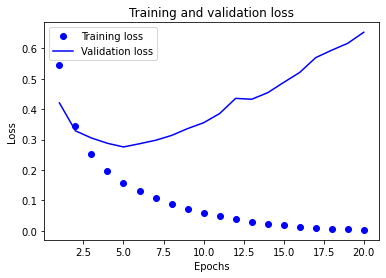

In [21]:
## EVALUATING THE PERFORMANCE
#Plotting the training and validation loss
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') #bo:blue-dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') #b:solid-blue
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

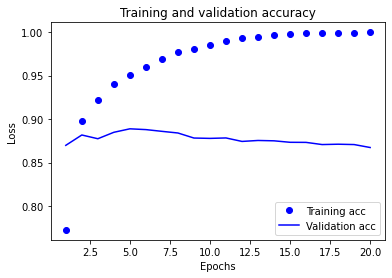

In [22]:
#Plotting the training and validation accuracy
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Adding L2 Regularization to the Model

In [23]:
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001),
                      activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                      activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
# Compilation
from keras import losses
from keras import metrics
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


## CREATING A VALIDATION SET
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


## CREATING A HISTORY
history2 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5788 - binary_accuracy: 0.7694 - val_loss: 0.4525 - val_binary_accuracy: 0.8650
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3755 - binary_accuracy: 0.8962 - val_loss: 0.3669 - val_binary_accuracy: 0.8828
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3026 - binary_accuracy: 0.9156 - val_loss: 0.3372 - val_binary_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2611 - binary_accuracy: 0.9328 - val_loss: 0.3344 - val_binary_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2399 - binary_accuracy: 0.9379 - val_loss: 0.3580 - val_binary_accuracy: 0.8783
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2211 - binary_accuracy: 0.9482 - val_loss: 0.3373 - val_binary_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - los

In [25]:
history_dict2 = history2.history

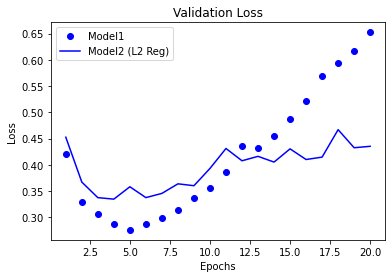

In [26]:
#Plotting the training and validation accuracy
val_loss_model1 = history_dict['val_loss']
val_loss_model2 = history_dict2['val_loss']

epochs1 = range(1, len(history_dict['loss']) + 1)
epochs2 = range(1, len(history_dict2['loss']) + 1)

plt.plot(epochs1, val_loss_model1, 'bo', label='Model1')
plt.plot(epochs2, val_loss_model2, 'b', label='Model2 (L2 Reg)')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()